## Generación de Archivos .vasp de la Estructuras Rotadas ##

In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
import numpy as np

In [2]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

In [3]:
Zr11m20 = surfaces_with_termination(zrortho, (1, 0, 0), 5, vacuum=10, termination='Zr')

In [4]:
rotated = []
dang = 15  # saltos entre los ángulos siguientes
for ang in range(0, 31, dang):
    rotated.append(Zr11m20[0].copy())
    rotated[-1].center()
    rotated[-1].rotate(ang, 'z', center="com")

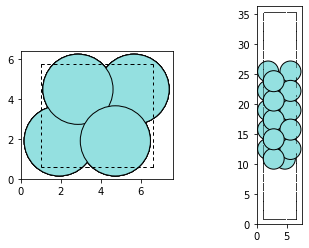

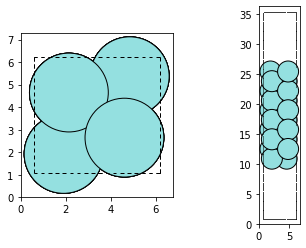

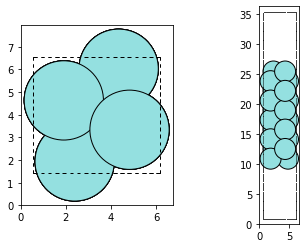

In [5]:
for i, thisatoms in enumerate(rotated):
    fig, ax = plt.subplots(1, 2)
    plot_atoms(thisatoms, ax=ax[0])
    plot_atoms(thisatoms, ax=ax[1], rotation="90x")

## Fabricación de Archivos para VESTA

##### Elegir el desde y hasta donde de la lista que se quieren hacer archivo y luego -> shift + enter

##### La variable "dang" de lineas anteriores controla el nombre de los archivos a generados

##### Si desde=0 y hasta=len(rotated) -> Se genera un archivo de todos los elementos de la lista

In [6]:
desde = 0
hasta = len(rotated)
plano = '11m20'

for i, rotatoms in enumerate(rotated):
    ang = i*dang
    name = 'rotated'+str(ang)+'.vasp'
    rotatoms.write(name, direct=True, sort=True)